In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('water.csv').drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

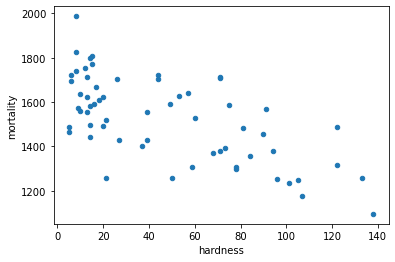

In [3]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [4]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df[['hardness']]
y = df['mortality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([1464.45706289, 1306.22146158, 1306.22146158, 1435.15417376,
       1350.17579528, 1637.34410876, 1619.76237528, 1619.76237528,
       1602.1806418 , 1490.8296631 , 1259.33683897, 1534.7839968 ,
       1520.13255224, 1610.97150854, 1584.59890832, 1417.57244028,
       1496.69024093, 1625.62295311, 1587.52919724])

In [20]:
model.score(X_test, y_test)

0.5710063963317071

<AxesSubplot:xlabel='mortality'>

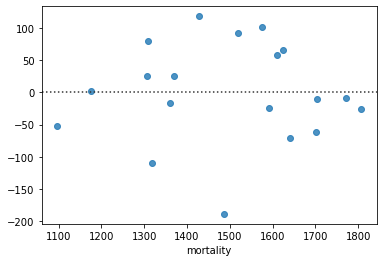

In [21]:
sns.residplot(x=y_test,
              y=y_pred)

In [23]:
df_south = df.loc[df.location == 'South']
df_north = df.loc[df.location == 'North']

<AxesSubplot:title={'center':'South'}, xlabel='hardness', ylabel='mortality'>

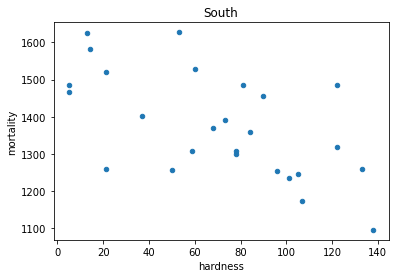

In [24]:
df_south.plot(kind='scatter', x='hardness', y='mortality', title='South')

<AxesSubplot:title={'center':'North'}, xlabel='hardness', ylabel='mortality'>

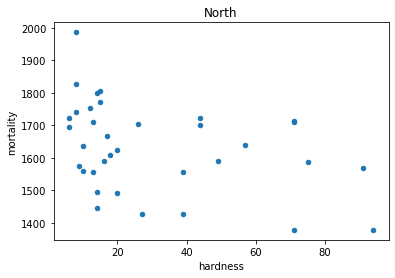

In [25]:
df_north.plot(kind='scatter', x='hardness', y='mortality', title='North')

In [26]:
print('Коэффициент Пирсона для южных городов')
df_south[['hardness', 'mortality']].corr()

Коэффициент Пирсона для южных городов


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [112]:
print('Коэффициент Пирсона для северных городов')
df_north[['hardness', 'mortality']].corr()

Коэффициент Пирсона для северных городов


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [113]:
print('Коэффициент Спирмана для южных городов')
df_south[['hardness', 'mortality']].corr(method='spearman')

Коэффициент Спирмана для южных городов


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [114]:
print('Коэффициент Спирмана для северных городов')
df_north[['hardness', 'mortality']].corr(method='spearman')

Коэффициент Спирмана для северных городов


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [27]:
Xs = df_south[['hardness']]
ys = df_south['mortality']
Xn = df_north[['hardness']]
yn = df_north['mortality']

In [28]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state=3)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.3, random_state=3)

In [32]:
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train) 

LinearRegression()

In [33]:
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train) 

LinearRegression()

In [34]:
ys_pred = model_s.predict(Xs_test)
ys_pred

array([1319.16121282, 1338.17115384, 1469.51256452, 1402.11368273,
       1308.79215408, 1485.06615263, 1391.74462399, 1358.90927132])

In [35]:
yn_pred = model_n.predict(Xn_test)
yn_pred

array([1642.38060266, 1568.16657525, 1627.80284728, 1654.30785707,
       1651.65735609, 1626.47759679, 1641.05535217, 1651.65735609,
       1650.3321056 , 1568.16657525, 1649.00685511])

In [36]:
model_s.score(Xs_test, ys_test)

0.4119723765575952

In [37]:
model_n.score(Xn_test, yn_test)

0.0839354101667884

<AxesSubplot:xlabel='mortality'>

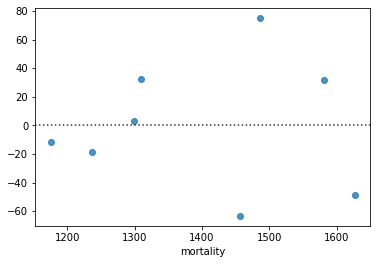

In [38]:
sns.residplot(x=ys_test,
              y=ys_pred)

<AxesSubplot:xlabel='mortality'>

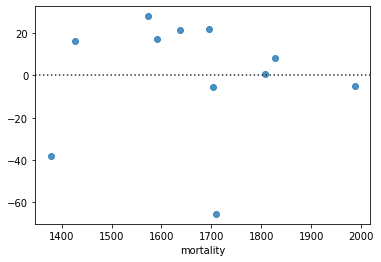

In [39]:
sns.residplot(x=yn_test,
              y=yn_pred)

На севере мало городов с высокой жесткостью воды, данные севера не позволяют проследить связь жесткости воды со смертностью. На общей выборке и данных юга обратная зависимость прослеживается, но она не очень ярко выражена, большой разброс данных. Выборка,даже не разделенная на север и юг, слишком мала для построения хороших прогнозов